In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
df = pd.read_excel(r"Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [823]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [824]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [826]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='Airline'>

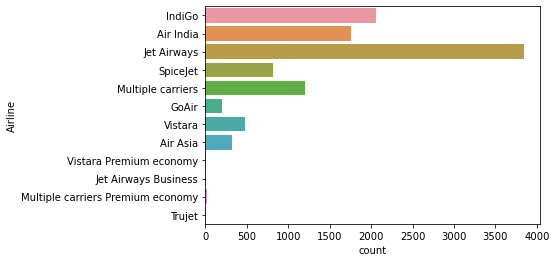

In [827]:
sns.countplot(y=df['Airline'],orient='v')

In [828]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

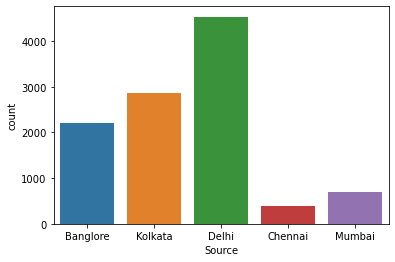

In [829]:
sns.countplot(x=df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

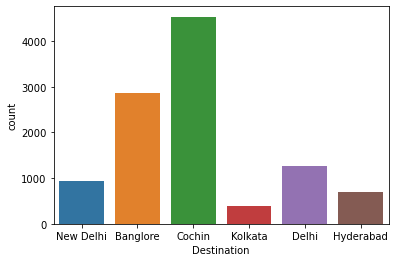

In [830]:
sns.countplot(x=df['Destination'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

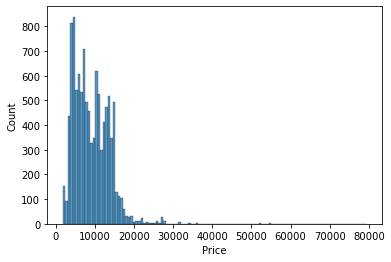

In [831]:
sns.histplot(df['Price'])

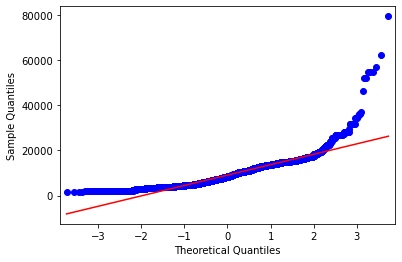

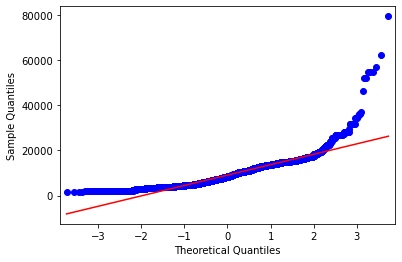

In [832]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['Price'],line='s')

# Multivariate Analysis

In [833]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<AxesSubplot:xlabel='Price', ylabel='Airline'>

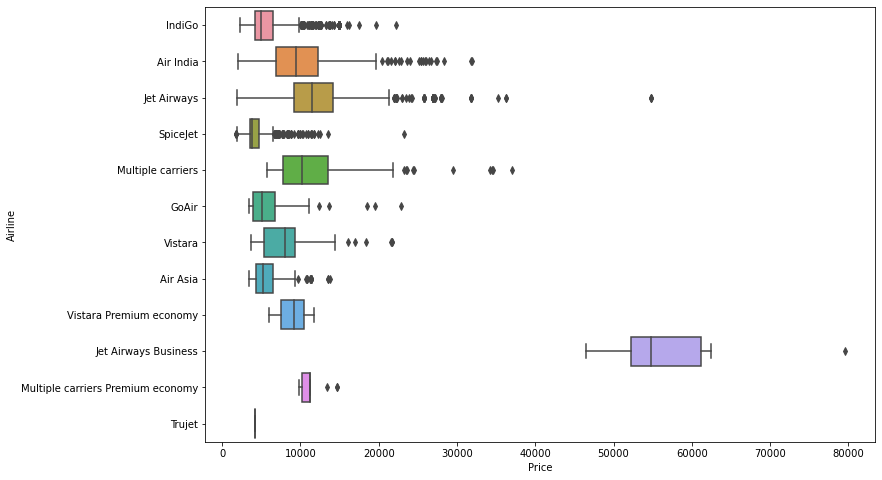

In [834]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df['Airline'],x=df['Price'])

<AxesSubplot:xlabel='Source', ylabel='Price'>

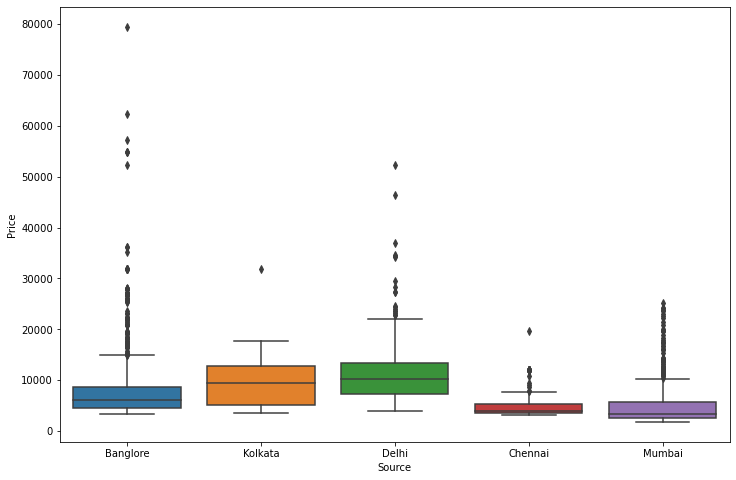

In [835]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Source'],df['Price'])

<AxesSubplot:xlabel='Destination', ylabel='Price'>

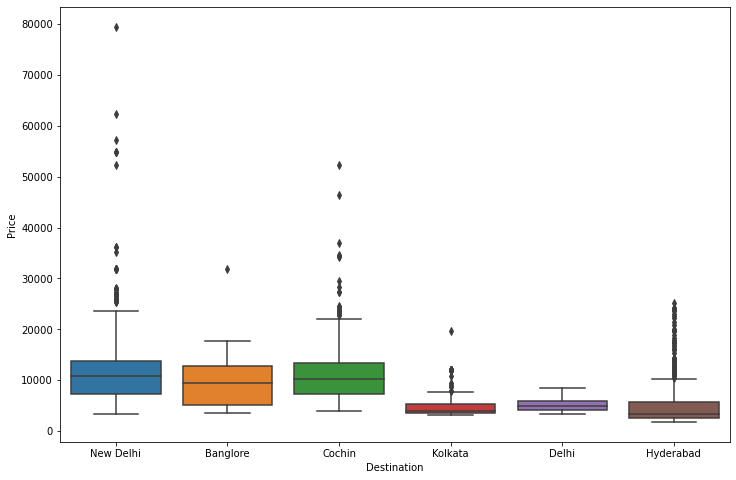

In [836]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Destination'],df['Price'])

# Feature Preprocessing

In [837]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
def datetime(df):
    df['Day'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True).dt.day
    df['Month'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True).dt.month
    df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df['Arr_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time'] ,inplace=True)

In [20]:
datetime(df)

In [21]:
df.drop(columns='Route',inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
df['Duration'] = df['Duration'].str.replace('h ', ':').str.replace('h', ':00').str.replace('m', '')

In [24]:
for i in df.index:
    if(len(df['Duration'][i].split(':'))!=2):
        print(df['Duration'][i],i)
        

5 6474


In [25]:
df[df.index==6474]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min
6474,Air India,Mumbai,Hyderabad,5,2 stops,No info,17327,6,3,16,50,16,55


In [26]:
df['Duration_hr']=0
df['Duration_min']=0
for i in df.index:
    if(len(df['Duration'][i].split(':'))==2):
        df['Duration_hr'][i] = df['Duration'][i].split(':')[0]
        df['Duration_min'][i] = df['Duration'][i].split(':')[1]
    else:
        df['Duration_hr'][i] = 0
        df['Duration_min'][i] = df['Duration'][i].split(':')[0]

        
        

In [27]:
df.drop(columns='Duration',inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
df.corr()['Price'].abs().sort_values()

Dep_hr          0.006799
Arr_hr          0.024244
Dep_min         0.024458
Arr_min         0.086155
Month           0.103643
Duration_min    0.124855
Day             0.153774
Duration_hr     0.508778
Price           1.000000
Name: Price, dtype: float64

In [849]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [30]:
df.drop(columns='Additional_Info',inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [852]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [33]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [856]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
l = list(df['Airline'].value_counts().tail(4).index)

In [35]:
df['Airline'] = df['Airline'].apply(lambda x:'Others'if x in l else x)

In [859]:
df['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Others                 23
Name: Airline, dtype: int64

In [36]:
df = pd.get_dummies(df,drop_first=True)

In [37]:
df.head()

,Total_Stops,Price,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hr,Duration_min,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [38]:
X = df.drop(columns='Price')
Y = df['Price']

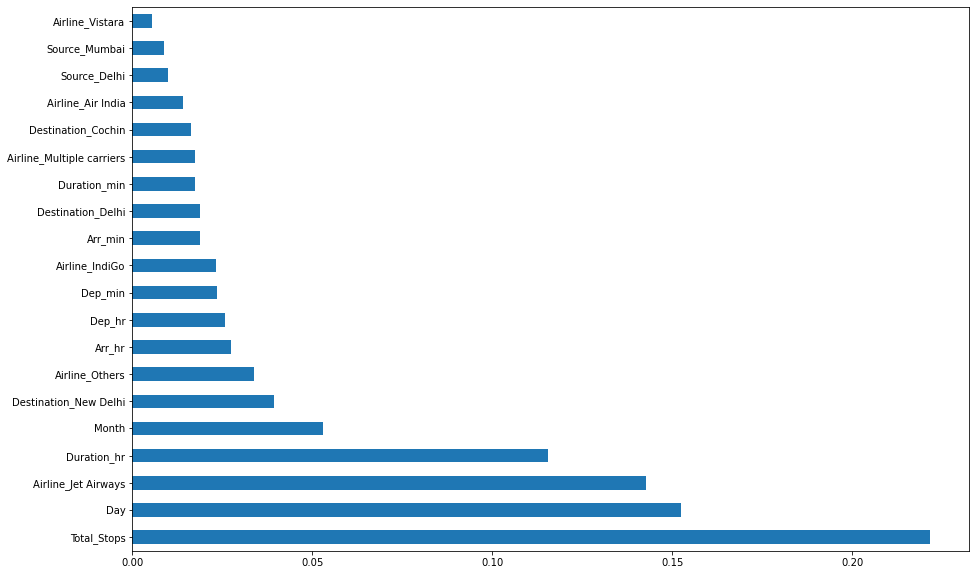

In [39]:
# Taking a look at important features
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X,Y)

# Visualizing Results
plt.figure(figsize=(15,10))
feat_imp = pd.Series(ETR.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

# Model Fitting

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
scaler = StandardScaler()
scaler1 = MinMaxScaler()

In [42]:
pd.set_option('display.max_columns',None)

In [43]:
X_scaled = scaler1.fit_transform(X)

In [44]:
X_scale = pd.DataFrame(X_scaled,columns=X.columns)
X_scale.head()

,Total_Stops,Day,Month,Dep_hr,Dep_min,Arr_hr,Arr_min,Duration_hr,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y,test_size=0.15,random_state=51)

In [871]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
train = rf.predict(xtrain)
test = rf.predict(xtest)

print("r2 score for train", r2_score(ytrain,train))
print("mean squared error for train",mse(ytrain,train))
print("r2 score for test", r2_score(ytest,test))
print("mean squared error for train",mse(ytest,test))

r2 score for train 0.9521904986729427
mean squared error for train 1036987.0900084387
r2 score for test 0.8255005223951363
mean squared error for train 3286792.7437219485


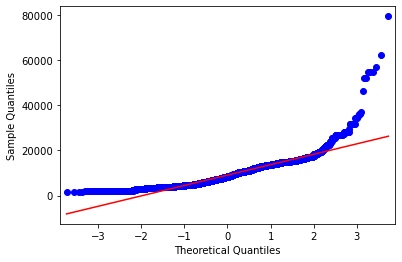

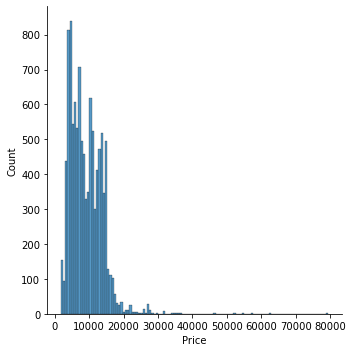

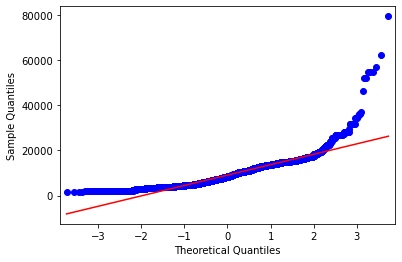

In [872]:
from statsmodels.graphics.gofplots import qqplot
sns.displot(Y)
qqplot(Y,line='s')

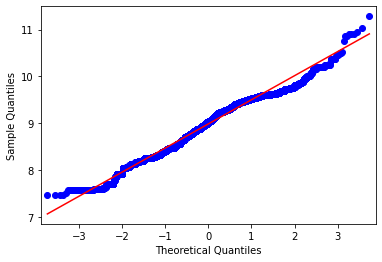

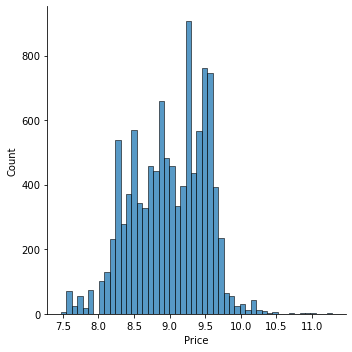

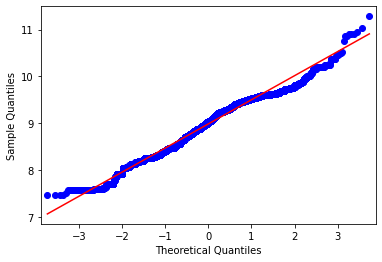

In [873]:
from statsmodels.graphics.gofplots import qqplot
sns.displot(np.log(Y))
qqplot(np.log(Y),line='s')

In [874]:
rf = RandomForestRegressor()
rf.fit(xtrain,np.log(ytrain))
train = rf.predict(xtrain)
test = rf.predict(xtest)


print("r2 score for train", r2_score(ytrain,np.exp(train)))
print("mean squared error for train",np.sqrt(mse(ytrain,np.exp(train))))
print("r2 score for test", r2_score(ytest,np.exp(test)))
print("mean squared error for train",np.sqrt(mse(ytest,np.exp(test))))

r2 score for train 0.9478783312275894
mean squared error for train 1063.2581588047158
r2 score for test 0.8373717426523483
mean squared error for train 1750.1976578853037


# HyperParameter Tuning

In [877]:
from sklearn.model_selection  import GridSearchCV

grid = {'n_estimators':[50,100,150,200,300],'min_samples_split':[2,5,10],
       'min_samples_leaf': [1,3,5],'max_features' : ['auto', 'sqrt'] }

In [878]:
gr = GridSearchCV(estimator=rf,param_grid=grid,scoring='neg_mean_squared_error',verbose=2,cv=4)

In [879]:
gr.fit(xtrain,np.log(ytrain))

Fitting 4 folds for each of 90 candidates, totalling 360 fits
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total t

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.4s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.4s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=3, mi

[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.9s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   4.1s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=5

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_l

[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [880]:
gr.best_estimator_

RandomForestRegressor(min_samples_split=10, n_estimators=200)

In [881]:
train = gr.predict(xtrain)
test = gr.predict(xtest)


print("r2 score for train", r2_score(ytrain,np.exp(train)))
print("mean squared error for train",np.sqrt(mse(ytrain,np.exp(train))))
print("r2 score for test", r2_score(ytest,np.exp(test)))
print("mean squared error for train",np.sqrt(mse(ytest,np.exp(test))))

r2 score for train 0.9025050819379181
mean squared error for train 1454.1880023651102
r2 score for test 0.8573512428202906
mean squared error for train 1639.1665776767659
